In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/cpe232-dataset/sample_submission.csv
/kaggle/input/cpe232-dataset/train.csv
/kaggle/input/cpe232-dataset/test.csv


In [2]:
df = pd.read_csv("/kaggle/input/cpe232-dataset/train.csv")

test_df = pd.read_csv("/kaggle/input/cpe232-dataset/test.csv")

In [3]:
df.head()

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,0,26.0,34427.0,RENT,5.946998,DEBTCONSOLIDATION,E,19270.0,11.272717,0.193133,Y,4.0,1
1,1,32.0,91102.0,MORTGAGE,8.527473,VENTURE,B,19815.0,12.831859,0.183127,N,4.0,0
2,2,25.0,25847.0,RENT,4.919103,PERSONAL,D,10043.0,15.532120,0.241554,Y,3.0,0
3,3,22.0,32863.0,RENT,3.427904,EDUCATION,NaN,12256.0,9.877151,0.198320,N,4.0,0
4,4,24.0,50740.0,RENT,2.842202,EDUCATION,C,6412.0,13.465822,0.185754,Y,2.0,1


In [4]:
df.shape

(39550, 13)

In [5]:
df.isnull().sum()

id                               0
person_age                    1085
person_income                 1058
person_home_ownership         1091
person_emp_length             1043
loan_intent                   1049
loan_grade                    1093
loan_amnt                     1081
loan_int_rate                 1077
loan_percent_income           1090
cb_person_default_on_file     1065
cb_person_cred_hist_length    1086
loan_status                      0
dtype: int64

In [6]:
df.describe()

,id,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,loan_status
count,39550.00000,38465.000000,38492.00000,38507.000000,38469.000000,38473.000000,38460.000000,38464.000000,39550.000000
mean,19774.50000,27.972650,60092.69430,5.201428,9349.245782,11.777246,0.163219,5.724288,0.254185
std,11417.24591,6.273788,31180.30954,3.437699,5696.712524,3.674727,0.100170,3.969586,0.435407
min,0.00000,21.000000,11664.00000,0.000046,118.000000,4.917300,0.000473,2.000000,0.000000
25%,9887.25000,24.000000,37699.75000,3.048524,5053.000000,8.092832,0.088853,3.000000,0.000000
50%,19774.50000,26.000000,52550.00000,4.964736,7681.000000,11.434505,0.133511,4.000000,0.000000
75%,29661.75000,30.000000,72169.50000,6.496326,12200.000000,14.090959,0.207444,7.000000,1.000000
max,39549.00000,66.000000,249272.00000,25.100039,36213.000000,22.969506,0.552968,31.000000,1.000000


## Replace the NaN values with the mean and the most occurances

In [7]:
# Separate numerical and categorical columns
numerical_columns = df.select_dtypes(include=['number'])
categorical_columns = df.select_dtypes(include=['object', 'category'])

# Fill missing values for numerical columns with the mean
df[numerical_columns.columns] = numerical_columns.fillna(numerical_columns.mean())

for col in categorical_columns.columns:
    # df[col] = categorical_columns[col].fillna(categorical_columns[col].mode()[0])

    least_frequent_value = categorical_columns[col].value_counts().idxmin()
    # Fill missing values with the least frequent value
    df[col] = categorical_columns[col].fillna(least_frequent_value)


print("DataFrame after handling missing values:")
print(df)

DataFrame after handling missing values:
          id  person_age  person_income person_home_ownership  \
0          0        26.0     34427.0000                  RENT   
1          1        32.0     91102.0000              MORTGAGE   
2          2        25.0     25847.0000                  RENT   
3          3        22.0     32863.0000                  RENT   
4          4        24.0     50740.0000                  RENT   
...      ...         ...            ...                   ...   
39545  39545        30.0    197453.0000              MORTGAGE   
39546  39546        21.0     77450.0000              MORTGAGE   
39547  39547        29.0     47254.0000                  RENT   
39548  39548        23.0     24691.0000                  RENT   
39549  39549        23.0     60092.6943                  RENT   

       person_emp_length        loan_intent loan_grade  loan_amnt  \
0               5.946998  DEBTCONSOLIDATION          E    19270.0   
1               8.527473            VENT

Also with the test.csv

In [8]:
# Separate numerical and categorical columns
numerical_columns = test_df.select_dtypes(include=['number'])
categorical_columns = test_df.select_dtypes(include=['object', 'category'])

# Fill missing values for numerical columns with the mean
test_df[numerical_columns.columns] = numerical_columns.fillna(numerical_columns.mean())

# Fill missing values for categorical columns with the mode (most frequent value)
for col in categorical_columns.columns:
    # test_df[col] = categorical_columns[col].fillna(categorical_columns[col].mode()[0])
    least_frequent_value = categorical_columns[col].value_counts().idxmin()
    # Fill missing values with the least frequent value
    test_df[col] = categorical_columns[col].fillna(least_frequent_value)

print("DataFrame after handling missing values:")
print(test_df)

DataFrame after handling missing values:
          id  person_age  person_income person_home_ownership  \
0      39550        22.0   30330.000000                  RENT   
1      39551        31.0   79403.000000              MORTGAGE   
2      39552        25.0   26966.000000                  RENT   
3      39553        25.0   60425.057994              MORTGAGE   
4      39554        27.0   87388.000000              MORTGAGE   
...      ...         ...            ...                   ...   
16945  56495        23.0   49100.000000                  RENT   
16946  56496        30.0   66618.000000              MORTGAGE   
16947  56497        32.0   34982.000000                  RENT   
16948  56498        22.0   50063.000000                 OTHER   
16949  56499        31.0   76258.000000              MORTGAGE   

       person_emp_length        loan_intent loan_grade  loan_amnt  \
0               6.221275            MEDICAL          C    19989.0   
1               9.876324            VENT

In [9]:
test_df.shape

(16950, 12)

## Data Preprocessing

In [10]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

In [11]:
# Apply LabelEncoder to each categorical column
label_encoders = {}
for col in categorical_columns.columns:
    label_encoders[col] = LabelEncoder()
    df[col] = label_encoders[col].fit_transform(df[col])
    test_df[col] = label_encoders[col].fit_transform(test_df[col])

print("Encoded DataFrame: !")

Encoded DataFrame: !


In [ ]:
import matplotlib.pyplot as plt

# Plot histograms for all columns
for column in df.columns:
    plt.figure(figsize=(6, 4))
    if df[column].dtype == 'object':  # Categorical column
        df[column].value_counts().plot(kind='bar', color='skyblue')
        plt.title(f'Distribution of {column} (Categorical)')
        plt.xlabel(column)
        plt.ylabel('Frequency')
    else:  # Numerical column
        df[column].plot(kind='hist', bins=10, color='lightgreen', edgecolor='black')
        plt.title(f'Distribution of {column} (Numerical)')
        plt.xlabel(column)
        plt.ylabel('Frequency')
    plt.grid(axis='y')
    plt.show()

In [13]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Assuming `df` is your DataFrame
select_features = ['person_age', 'person_income', 'person_emp_length', 'loan_amnt', 'loan_int_rate', 'cb_person_cred_hist_length']

# Initialize the scaler
scaler = StandardScaler()

# Apply the scaler to the selected features
df[select_features] = scaler.fit_transform(df[select_features])
test_df[select_features] = scaler.fit_transform(test_df[select_features])

See the correlations and the featurewiz to doing the feature engineering

## Feature correlations

In [ ]:
# !pip install featurewiz

In [14]:
df.head()

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,0,-0.318835,-0.834385,3,0.219801,0,4,1.765809,-0.139207,0.193133,1,-0.44047,1
1,1,0.650932,1.008104,0,0.980549,5,1,1.862815,0.290984,0.183127,0,-0.44047,0
2,2,-0.480463,-1.113318,3,-0.083232,4,3,0.123482,1.036027,0.241554,1,-0.69592,0
3,3,-0.965347,-0.885230,3,-0.522851,1,6,0.517377,-0.524265,0.198320,0,-0.44047,0
4,4,-0.642091,-0.304053,3,-0.695522,1,2,-0.522805,0.465904,0.185754,1,-0.95137,1


In [ ]:
df.columns

In [ ]:
from featurewiz import featurewiz

target = 'loan_status'

feats = featurewiz(df, target, corr_limit=0.7, verbose=0)
len(feats)

In [ ]:
wiz_features = ['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_percent_income', 'cb_person_default_on_file',
       'cb_person_cred_hist_length']

## Approach 1 : Catboost

In [45]:
!pip install catboost

In [46]:
!pip install optuna

In [44]:
from catboost import CatBoostClassifier, Pool
import pandas as pd

# Define your features and target
# features = ['loan_percent_income', 'loan_int_rate', 'cb_person_cred_hist_length']
features = ['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_percent_income', 'cb_person_default_on_file',
       'cb_person_cred_hist_length']
target = 'loan_status'  # Replace with the actual name of your target column

# Splitting the data into training and test sets (if needed)
from sklearn.model_selection import train_test_split
X = df[features]
y = df[target]
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [60]:
y.value_counts()

loan_status
0    29497
1    10053
Name: count, dtype: int64

Deal with the Imbalanced Datasets

In [61]:
from imblearn.under_sampling import RandomUnderSampler
import pandas as pd

# Initialize the undersampler
undersampler = RandomUnderSampler(sampling_strategy=1.0, random_state=42)

# Apply undersampling
X_resampled, y_resampled = undersampler.fit_resample(X, y)

# Combine resampled data into a new DataFrame
df_resampled = pd.concat([pd.DataFrame(X_resampled, columns=X.columns), pd.DataFrame(y_resampled, columns=['loan_status'])], axis=1)

print("Class distribution after undersampling:")
print(df_resampled['loan_status'].value_counts())

Class distribution after undersampling:
loan_status
0    10053
1    10053
Name: count, dtype: int64


## Old code

In [ ]:
# Initialize the CatBoost classifier
model = CatBoostClassifier(iterations=1000, learning_rate=0.02, depth=6, verbose=0)  # Adjust parameters as needed

# Train the model
model.fit(X_train, y_train)

# Evaluate the model
accuracy = model.score(X_test, y_test)
print(f"Model accuracy: {accuracy}")

# Feature importance (optional)
feature_importances = model.get_feature_importance()
for feature, importance in zip(features, feature_importances):
    print(f"Feature: {feature}, Importance: {importance}")

## New Code with Optuna Tuning

In [64]:
import optuna
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X = df_resampled[features]
y = df_resampled[target]

# Split your dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the objective function for Optuna
def objective(trial):
    # Suggest values for hyperparameters
    param = {
        "iterations": trial.suggest_int("iterations", 500, 2000),
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.3, log=True),
        "depth": trial.suggest_int("depth", 4, 10),
        "l2_leaf_reg": trial.suggest_float("l2_leaf_reg", 1e-3, 10, log=True),
        "bagging_temperature": trial.suggest_float("bagging_temperature", 0, 1),
        "random_strength": trial.suggest_float("random_strength", 1e-3, 10, log=True),
        "border_count": trial.suggest_int("border_count", 32, 255),
    }

    # Initialize CatBoostClassifier with suggested hyperparameters
    model = CatBoostClassifier(
        **param, 
        verbose=0  # Disable verbose output
    )
    
    # Train the model
    model.fit(X_train, y_train)

    # Predict on the test set
    y_pred = model.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy

# Create Optuna study
study = optuna.create_study(direction="maximize")  # Maximize accuracy
study.optimize(objective, n_trials=50, timeout=1800)  # Adjust trials and timeout as needed

# Best trial
print("Best hyperparameters:", study.best_params)
print("Best accuracy:", study.best_value)

Best hyperparameters: {'iterations': 720, 'learning_rate': 0.0250560486726278, 'depth': 6, 'l2_leaf_reg': 1.0206463024826533, 'bagging_temperature': 0.056086486571926386, 'random_strength': 3.6460267341954458, 'border_count': 144}
Best accuracy: 0.8125310790651418


Best hyperparameters: {'iterations': 854, 'learning_rate': 0.030054302742990664, 'depth': 5, 'l2_leaf_reg': 0.0025985773600677997, 'bagging_temperature': 0.16994742077661723, 'random_strength': 1.6930962960962412, 'border_count': 178}
Best accuracy: 0.8450063211125158

In [65]:
# Train the final model with the best parameters
best_params = study.best_params
final_model = CatBoostClassifier(**best_params, verbose=0)
final_model.fit(X_train, y_train)

# Evaluate the final model
y_pred = final_model.predict(X_test)
final_accuracy = accuracy_score(y_test, y_pred)
print(f"Final Model Accuracy: {final_accuracy}")

Final Model Accuracy: 0.8125310790651418


In [66]:
# Predict on the test dataset
test_predictions = final_model.predict(test_df[features])

# Create a submission DataFrame
submission = pd.DataFrame({
    'id': test_df['id'],  # Ensure your test_df has an 'Id' column
    'loan_status': test_predictions
})

# Save to CSV
submission.to_csv('submission_undersamp.csv', index=False)

print("Submission file saved as submission.csv")

Submission file saved as submission.csv


In [52]:
test_predictions

array([1, 0, 1, ..., 0, 0, 0])

## Approach 4 : LightGBM

In [ ]:
import optuna
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X = df_resampled[features]
y = df_resampled[target]

# Split your dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the objective function for Optuna
def objective(trial):
    # Suggest hyperparameters
    param = {
        "objective": trial.suggest_categorical("objective", ["binary"]),
        "boosting_type": trial.suggest_categorical("boosting_type", ["gbdt", "dart", "goss"]),
        "num_leaves": trial.suggest_int("num_leaves", 31, 256),
        "max_depth": trial.suggest_int("max_depth", 5, 20),
        "learning_rate": trial.suggest_float("learning_rate", 1e-4, 0.3, log=True),
        "n_estimators": trial.suggest_int("n_estimators", 100, 1000),
        "min_child_weight": trial.suggest_int("min_child_weight", 1, 10),
        "subsample": trial.suggest_float("subsample", 0.5, 1.0),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.5, 1.0),
        "reg_alpha": trial.suggest_float("reg_alpha", 1e-4, 10.0, log=True),
        "reg_lambda": trial.suggest_float("reg_lambda", 1e-4, 10.0, log=True),
    }

    # Initialize LightGBM model
    model = lgb.LGBMClassifier(**param, random_state=42)

    # Train the model
    model.fit(X_train, y_train)

    # Predict on the test set
    y_pred = model.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy

# Create Optuna study
study = optuna.create_study(direction="maximize")  # Maximize accuracy
study.optimize(objective, n_trials=50, timeout=1800)  # Adjust trials and timeout as needed

# Best trial
print("Best hyperparameters:", study.best_params)
print("Best accuracy:", study.best_value)

In [ ]:
# Train the final model with the best parameters
best_params = study.best_params
final_model = lgb.LGBMClassifier(**best_params, random_state=42)
final_model.fit(X_train, y_train)

# Evaluate the final model
y_pred = final_model.predict(X_test)
final_accuracy = accuracy_score(y_test, y_pred)
print(f"Final Model Accuracy: {final_accuracy}")

In [70]:
import numpy as np
from sklearn.metrics import accuracy_score

# Evaluate the final model with predict_proba
y_proba = final_model.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class (class 1)

# Find the optimal threshold for maximum accuracy
thresholds = np.linspace(0, 1, 101)  # Generate thresholds from 0.0 to 1.0
best_threshold = 0
best_accuracy = 0

for threshold in thresholds:
    y_pred = (y_proba >= threshold).astype(int)  # Apply threshold to convert probabilities to binary predictions
    accuracy = accuracy_score(y_test, y_pred)
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_threshold = threshold

# Print the best threshold and corresponding accuracy
print(f"Best Threshold: {best_threshold}")
print(f"Accuracy at Best Threshold: {best_accuracy}")

# Use the best threshold to make predictions
y_pred_optimal = (y_proba >= best_threshold).astype(int)
final_accuracy = accuracy_score(y_test, y_pred_optimal)
print(f"Final Model Accuracy with Optimal Threshold: {final_accuracy}")

[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
Best Threshold: 0.5
Accuracy at Best Threshold: 0.8070611636001989
Final Model Accuracy with Optimal Threshold: 0.8070611636001989


TypeError: only integer scalar arrays can be converted to a scalar index

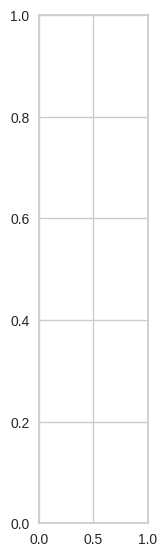

In [75]:
import shap

# Initialize SHAP explainer
explainer = shap.Explainer(final_model)

# Calculate SHAP values for the test set
shap_values = explainer(X_test)

# Visualize global feature importance
shap.summary_plot(shap_values, X_test)

# Visualize individual predictions (optional)
shap.force_plot(explainer.expected_value[0], shap_values.values[0], X_test.iloc[0])

In [71]:
# Predict on the test dataset
test_predictions = final_model.predict(test_df[features])

# Create a submission DataFrame
submission = pd.DataFrame({
    'id': test_df['id'],  # Ensure your test_df has an 'Id' column
    'loan_status': test_predictions
})

# Save to CSV
submission.to_csv('submission_undersamp_lightgbm.csv', index=False)

print("Submission file saved as submission.csv")

[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
Submission file saved as submission.csv


## Approach 2 : Logistics Regression

In [53]:
import optuna
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Split your dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the objective function for Optuna
def objective(trial):
    # Suggest values for hyperparameters
    param = {
        "C": trial.suggest_float("C", 1e-4, 10.0, log=True),  # Regularization strength
        "penalty": trial.suggest_categorical("penalty", ["l1", "l2"]),  # Regularization type
        "solver": trial.suggest_categorical("solver", ["liblinear", "saga"]),  # Solver for optimization
    }

    # Initialize LogisticRegression with suggested hyperparameters
    model = LogisticRegression(**param, max_iter=1000, random_state=42)

    # Train the model
    model.fit(X_train, y_train)

    # Predict on the test set
    y_pred = model.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy

# Create Optuna study
study = optuna.create_study(direction="maximize")  # Maximize accuracy
study.optimize(objective, n_trials=50, timeout=1200)  # Adjust trials and timeout as needed

# Best trial
print("Best hyperparameters:", study.best_params)
print("Best accuracy:", study.best_value)

Best hyperparameters: {'C': 0.29992233220928644, 'penalty': 'l2', 'solver': 'liblinear'}
Best accuracy: 0.8279393173198483


{'C': 0.29992233220928644, 'penalty': 'l2', 'solver': 'liblinear'}

In [54]:
# Train the final model with the best parameters
best_params = study.best_params
final_model = LogisticRegression(**best_params, max_iter=1000, random_state=42)
final_model.fit(X_train, y_train)

# Evaluate the final model
y_pred = final_model.predict(X_test)
final_accuracy = accuracy_score(y_test, y_pred)
print(f"Final Model Accuracy: {final_accuracy}")

Final Model Accuracy: 0.8279393173198483


In [57]:
# Predict on the test dataset
test_predictions = final_model.predict(test_df[features])

# Create a submission DataFrame
submission = pd.DataFrame({
    'id': test_df['id'],  # Ensure your test_df has an 'Id' column
    'loan_status': test_predictions
})

# Save to CSV
submission.to_csv('submission_logistics.csv', index=False)

print("Submission file saved as submission.csv")

Submission file saved as submission.csv


## Approach 2 : PyCaret AutoML

In [ ]:
!pip install pycaret

In [ ]:
numerical_columns.columns

In [17]:
from pycaret.regression import *

# Set up model
# regression = setup(df,
#                    target = 'loan_status',
#                    train_size = 0.8,
#                    categorical_features = categorical_columns.columns,
#                    categorical_imputation = 'constant', #For deploy purpose
#                    numeric_features = numerical_columns.columns,
#                    numeric_imputation = 'mean', #For deploy purpose
#                    normalize = True,
#                    normalize_method = 'minmax',
#                    # handle_unknown_categorical = True, #For deploy purpose
#                    # unknown_categorical_method = 'least_frequent', #For deploy purpose
#                    polynomial_features = True,
#                    polynomial_degree = 2,
#                    fold = 5,
#                    n_jobs = -1,
#                    use_gpu = True)

In [18]:
df['loan_status'].dtype

dtype('int64')

In [22]:
df['loan_status'] = df['loan_status'].astype('int64')

In [23]:
df['loan_status'].unique()

array([1, 0])

In [26]:
clf1 = setup(
    data=df,
    target='loan_status',
    numeric_imputation = 'mean',
)

,Description,Value
0,Session id,2117
1,Target,loan_status
2,Target type,Regression
3,Original data shape,"(39550, 13)"
4,Transformed data shape,"(39550, 13)"
5,Transformed train set shape,"(27685, 13)"
6,Transformed test set shape,"(11865, 13)"
7,Numeric features,12
8,Preprocess,True
9,Imputation type,simple


In [27]:
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.2206,0.1099,0.3314,0.4176,0.2324,0.4360,27.9140
catboost,CatBoost Regressor,0.2239,0.1106,0.3326,0.4135,0.2335,0.4374,4.2870
gbr,Gradient Boosting Regressor,0.2324,0.1111,0.3333,0.4109,0.2343,0.4523,2.8050
et,Extra Trees Regressor,0.2328,0.1158,0.3402,0.3862,0.2403,0.4431,1.5990
rf,Random Forest Regressor,0.2339,0.1174,0.3426,0.3775,0.2418,0.4492,6.7840
xgboost,Extreme Gradient Boosting,0.2314,0.1182,0.3438,0.3734,0.2412,0.4428,0.1840
br,Bayesian Ridge,0.2885,0.1287,0.3587,0.3178,0.2556,0.5104,0.0260
lr,Linear Regression,0.2884,0.1287,0.3587,0.3178,0.2556,0.5101,0.6020
ridge,Ridge Regression,0.2885,0.1287,0.3587,0.3178,0.2556,0.5103,0.0240
lar,Least Angle Regression,0.2893,0.1293,0.3595,0.3148,0.2567,0.5040,0.0250


LGBMRegressor(n_jobs=-1, random_state=2117)

In [28]:
lgbm  = create_model('lightgbm')  

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.2219,0.1107,0.3328,0.4143,0.2327,0.4497
1,0.2245,0.1118,0.3344,0.4028,0.2345,0.4519
2,0.2234,0.1119,0.3345,0.4041,0.2352,0.4359
3,0.2163,0.1079,0.3285,0.4118,0.2318,0.4245
4,0.2145,0.1035,0.3218,0.4466,0.2259,0.4208
5,0.2270,0.1152,0.3394,0.3838,0.2380,0.4570
6,0.2160,0.1066,0.3265,0.4436,0.2288,0.4152
7,0.2157,0.1050,0.3240,0.4406,0.2271,0.4333
8,0.2261,0.1172,0.3423,0.3850,0.2398,0.4452


In [29]:
predictions = predict_model(lgbm, data=test_df)
predictions.head()

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,prediction_label
0,39550,-0.967516,-0.966231,3,0.274098,3,2,1.890694,0.799693,0.377784,1,-4.387251e-01,1.087745
1,39551,0.490594,0.609305,0,1.335071,5,0,0.445787,-0.358740,0.135866,0,1.101291e+00,0.009002
2,39552,-0.481479,-1.074236,3,-0.764461,3,2,-0.152056,0.860787,0.036416,0,-4.387251e-01,0.753642
3,39553,-0.481479,0.000000,0,1.004127,0,0,2.583858,-1.039560,0.161265,0,2.279681e-16,0.046744
4,39554,-0.157455,0.865671,0,-0.084425,4,0,-0.583043,-1.571152,0.064072,0,-9.520637e-01,-0.010346


In [30]:
predictions['prediction_label']

0        1.087745
1        0.009002
2        0.753642
3        0.046744
4       -0.010346
           ...   
16945    0.438654
16946    0.253272
16947    0.221009
16948    0.337756
16949   -0.000045
Name: prediction_label, Length: 16950, dtype: float64

In [33]:
sub = predictions['prediction_label']

In [40]:
sub.head()

0    1.087745
1    0.009002
2    0.753642
3    0.046744
4   -0.010346
Name: prediction_label, dtype: float64

In [41]:
sub = sub.apply(lambda x: 1 if x >= 0.5 else 0)

In [42]:
sub.value_counts()

prediction_label
0    13361
1     3589
Name: count, dtype: int64

In [43]:
sub.to_csv('submission_regression_pycaret.csv',index=False)
sub.head()

0    1
1    0
2    1
3    0
4    0
Name: prediction_label, dtype: int64